<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [2]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
from scipy import stats

from IPython.display import HTML

BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [3]:
# Ocultar código

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [4]:
seaborn.__version__

'0.9.0'

In [5]:
dataset = pandas.read_csv('hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [6]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [7]:
general_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols = general_cols + [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [8]:
#dataset[important_cols]

In [9]:
# Algunos subsets que nos interesaran analizar y comparar
mundo_noarg = dataset[dataset.countries != 'Argentina']
latam = dataset[dataset.region == 'Latin America & the Caribbean']
latam_noarg = latam[latam.countries != 'Argentina']
argentina = dataset[dataset.countries == 'Argentina']
regiones = { "Mundo" : dataset,
             "Mundo sin Arg." : mundo_noarg,
             "Latam" : latam,
             "Latam sin Arg." : latam_noarg,
             "Argentina" : argentina
            }

In [55]:
# A continuación mostramos el "peso" de cada región (cantidad de países que las comprenden).
region_dataset = dataset[dataset.year == 2016]
for region in region_dataset.region.unique():
    print (region + ": " +
str(len(region_dataset[region_dataset.region == region])/len(region_dataset)))

Eastern Europe: 0.13580246913580246
Middle East & North Africa: 0.11728395061728394
Sub-Saharan Africa: 0.25925925925925924
Latin America & the Caribbean: 0.16049382716049382
Caucasus & Central Asia: 0.037037037037037035
Oceania: 0.024691358024691357
Western Europe: 0.1111111111111111
South Asia: 0.10493827160493827
North America: 0.012345679012345678
East Asia: 0.037037037037037035


## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

 #### 1.1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.


In [11]:
dataset[important_cols].describe()

,year,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
count,1458.000000,205.000000,923.000000,923.000000,1358.000000,1375.000000,1378.000000,1378.000000,585.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,2012.000000,6.307317,7.248104,7.632719,7.428203,6.709091,7.935414,7.325835,7.538462,7.334180,6.785610,76.973149,6.993444,77.007983
std,2.582875,3.635095,3.953387,3.689772,3.705913,4.683089,4.028877,4.048606,3.644142,3.159473,0.883601,44.540142,1.025811,44.506549
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.880000,1.000000,3.765827,1.000000
25%,2010.000000,7.000000,5.000000,5.000000,5.000000,0.000000,10.000000,5.000000,5.000000,5.000000,6.250000,38.000000,6.336685,39.000000
50%,2012.000000,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.166667,6.900000,77.000000,6.923840,76.000000
75%,2014.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.410000,115.000000,7.894660,115.000000
max,2016.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.190000,162.000000,9.126313,162.000000


Las variables del índice van del 0 al 10 para todas las mediciones (de acuerdo también a la especificación de la metodología). Los paises con medición son 162, con lo que las variables de ranking no tienen demasiado sentido en esta descripción. Las variables de scoore aportan el dato de rango a partir de los mínimos y máximos históricos obtenidos.

#### 1.2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 

In [12]:
pandas.DataFrame({
    region: {
        'Min': regiones[region]['pf_identity'].min(),
        'Max': regiones[region]['pf_identity'].max(),
        'Media': regiones[region]['pf_identity'].mean(),
        'Mediana': regiones[region]['pf_identity'].median(),
        'Desvio std': regiones[region]['pf_identity'].std(),
    } for region in regiones.keys()
})


,Mundo,Mundo sin Arg.,Latam,Latam sin Arg.,Argentina
Desvio std,3.159473,3.162417,1.711732,1.727568,0.0
Max,10.000000,10.000000,10.000000,10.000000,10.0
Media,7.334180,7.316654,8.765086,8.715247,10.0
Mediana,9.166667,8.750000,10.000000,10.000000,10.0
Min,0.000000,0.000000,5.000000,5.000000,10.0


- el rango en Latam es la mitad que el global
- el mínimo de Latam se ubica al medio del rango global
- en Latam no hay valores de pf identity por debajo de 5
- en Argentina no hay valores de pf identity diferentes de 10

In [13]:
pandas.DataFrame({
    region: {
        'Min': regiones[region]['hf_score'].min(),
        'Max': regiones[region]['hf_score'].max(),
        'Media': regiones[region]['hf_score'].mean(),
        'Mediana': regiones[region]['hf_score'].median(),
        'Desvio std': regiones[region]['hf_score'].std(),
    } for region in regiones.keys()
})

,Mundo,Mundo sin Arg.,Latam,Latam sin Arg.,Argentina
Desvio std,1.025811,1.028636,0.608904,0.614153,0.279159
Max,9.126313,9.126313,8.290152,8.290152,7.035120
Media,6.993444,6.995524,7.047982,7.062952,6.677056
Mediana,6.923840,6.925910,7.028045,7.034437,6.570844
Min,3.765827,3.765827,4.200724,4.200724,6.207145


- en Latam hf score no presenta marcadas referencias respecto a los valores globales
- en Argentina no hay valores de hf score por fuera de [6.2 y 7.03]; tiene muy poca dispersión pero no son valores altos.

Consideramos que no tiene sentido calcular la moda en información no categórica. Quizá tenga sentido la moda en una clasificación de datos por rangos de evaluaciones en el índice, que nos pueda brindar información de cómo se comportan las mediciones en una categorización dada.

####   1.3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?

El score de la libertad humana es un cálculo que depende de las variables de libertad personal, con lo cual tenemos que tener esto presente a la hora de compararlas directamente.

Consideramos que la variable de libertad económica también puede influenciarlos.

#### 1.4. ¿Cómo pueden sanearse los valores faltantes?

Los datos faltantes, de acuerdo al estudio, son por falta de mediciones de fuentes confiables o por información que quedaba por fuera de la metodología planteada. Quizá los datos podrían completarse con estimaciones a partir de otras variables, pero consideramos que escaparía a una interpretación razonable de los resultados.

#### 1.5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

In [14]:
# Outliers
hf_score = dataset[['hf_score', 'countries', 'year']]
mask_hf_score = numpy.abs(hf_score.hf_score - hf_score.hf_score.mean()) > (2.5 * hf_score.hf_score.std())
data = hf_score[mask_hf_score]
data.reset_index(drop=True)

,hf_score,countries,year
0,4.258014,Iraq,2016
1,4.310283,Libya,2016
2,3.765827,Syria,2016
3,4.200724,Venezuela,2016
4,4.253278,"Yemen, Rep.",2016
5,3.910826,Syria,2015
6,4.241750,Venezuela,2015
7,4.203442,"Yemen, Rep.",2015
8,4.023595,Syria,2014
9,4.095028,Syria,2013


In [15]:
pf_identity = dataset[['pf_identity', 'countries', 'year', 'region']]
mask_pf_identity = numpy.abs(pf_identity.pf_identity - pf_identity.pf_identity.mean()) > (2.5 * pf_identity.pf_identity.std())
data = pf_identity[mask_pf_identity]
data.reset_index(drop=True)

,pf_identity,countries,year,region


Se encuentran outliers a nivel global que se desfasan en más de 2.5 veces el desvío estándar, para el caso del score de libertad humana.
Se puede observar que los pasíses involucrados son algunos de Oriente Medio y Venezuela, en algunos años. Por lo que, cabe destacar que son países que sufrieron episodios de guerra, crisis económica o cuyos regímenes de gobierno son y/o fueron criticados en el pasado por tener características autoritarias o no contemplativas de los derechos de las minorías.
Dada la naturaleza del estudio consideramos que no debemos sacar estos datos. Lo que es más, creemos que sacarlos atentaría contra la objetividad en el estudio de la información, ya que no los asociamos con errores de carga, sino con eventos concretos y que a futuro pueden enriquecer o aportar al entendimiento de las variables en cuestión

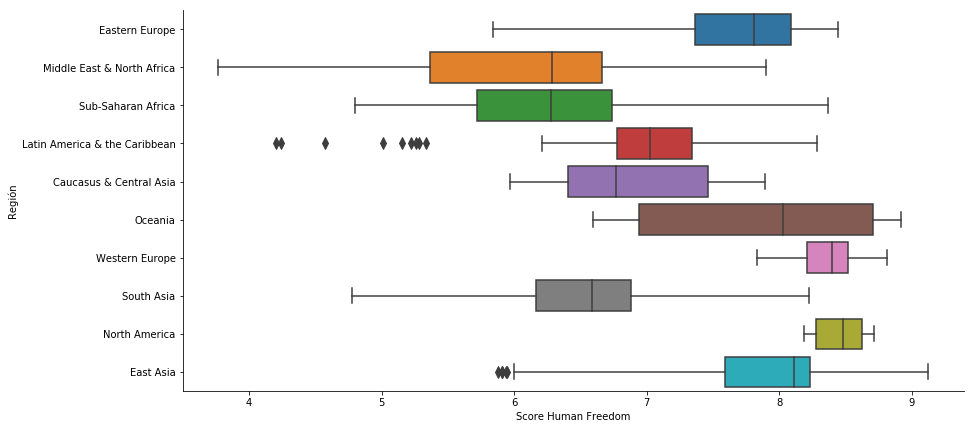

In [16]:
plt.figure(figsize=(14,7))
seaborn.boxplot(data=dataset,
                y='region', x='hf_score',
                whis=2.5, fliersize=8)
plt.xlabel('Score Human Freedom')
plt.ylabel('Región')
seaborn.despine()

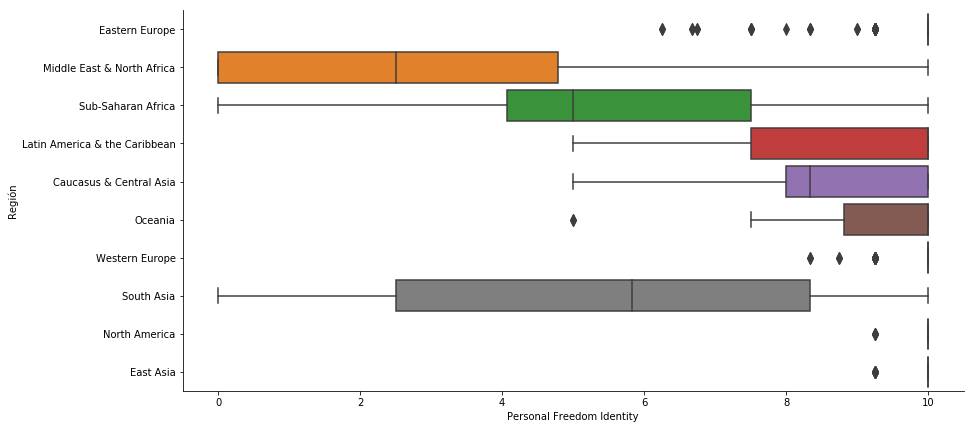

In [17]:
plt.figure(figsize=(14,7))
seaborn.boxplot(data=dataset,
                y='region', x='pf_identity',
                whis=2.5, fliersize=8)
plt.xlabel('Personal Freedom Identity')
plt.ylabel('Región')
seaborn.despine()

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

#### 2.1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.

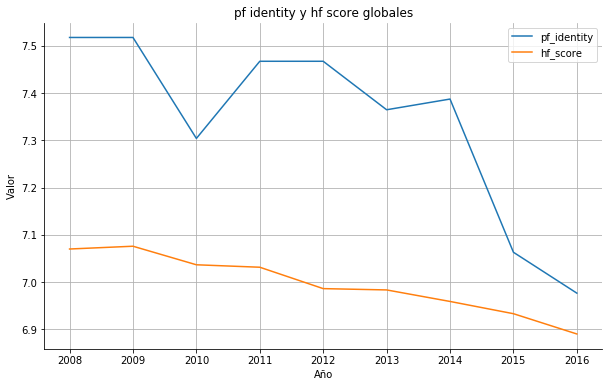

In [18]:
pf_identity = dataset[['pf_identity', 'countries', 'year', 'region']]
hf_score = dataset[['hf_score', 'countries', 'year', 'region']]

plt.figure(figsize=(10,6))
seaborn.lineplot(data=pf_identity, x='year', y='pf_identity', ci=None, label='pf_identity')
seaborn.lineplot(data=hf_score, x='year', y='hf_score', ci=None, label='hf_score')
plt.title('pf identity y hf score globales')
plt.grid(True)
plt.ylabel('Valor')
plt.xlabel('Año')
#plt.ylim(6,9)
seaborn.despine()

#### 2.2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?

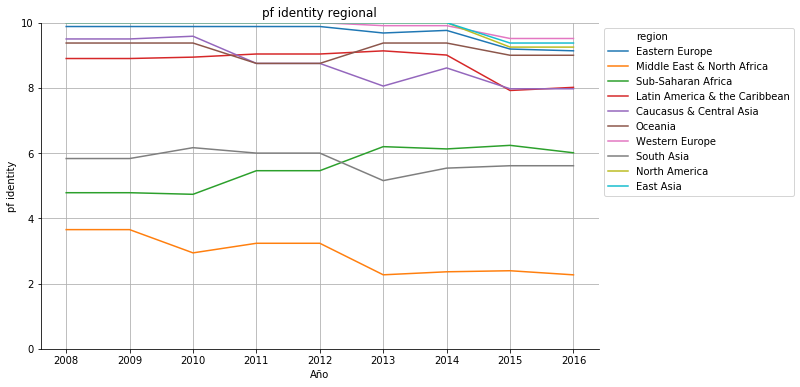

In [19]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=dataset, x='year', y='pf_identity', hue='region',ci=None)
plt.grid(True)
plt.xlabel('Año')
plt.ylabel('pf identity')
plt.title('pf identity regional')
plt.ylim(0, 10)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
seaborn.despine()

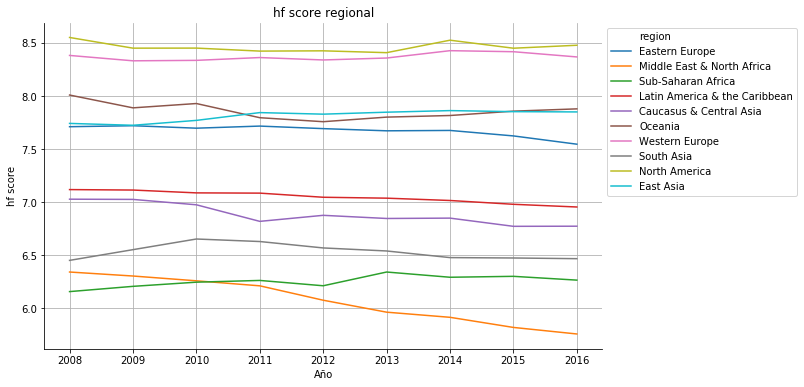

In [20]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=dataset, x='year', y='hf_score', hue='region',ci=None)
plt.xlabel('Año')
plt.ylabel('hf score')
plt.title('hf score regional')
plt.grid(True)
#plt.ylim(0, 10)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
seaborn.despine()

**hf score**

Las tendencias globales son similares en la división por regiones.
- el único que tiene un descenso más marcado es Middle East

**pf identity**

Las tendencias globales _no_ son similares en la división por regiones. En la gráfica puede verse cuáles regiones fueron las que "colaboraron" en gran medida con las bajas de los índices:
- 2010 Middle East y Africa tiene un marcado descenso
- 2014 - 2015 América latina tiene un marcado descenso y las regiones con índices más altos también presentan un descenso; que aunque es leve, en la sumatoria creemos que impactan en el valor global
- 2008 - 2015 mientras todas las regiones van en descenso, Sub Saharan Africa va en ascenso

#### 2.3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

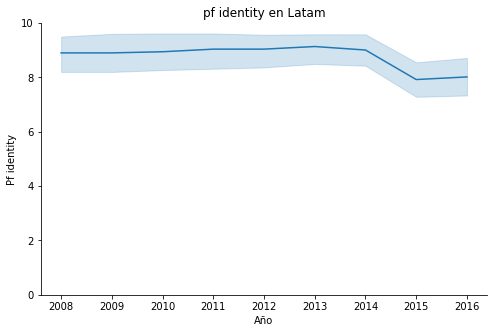

In [21]:
pf_identity = latam[['pf_identity', 'countries', 'year', 'region']]

plt.figure(figsize=(8,5))
seaborn.lineplot(data=latam, x='year', y='pf_identity')
plt.ylabel('Pf identity')
plt.xlabel('Año')
plt.title('pf identity en Latam')
plt.ylim(0,10)
seaborn.despine()

Haciendo foco en pf identity a lo largo de los años, se puede observar que entre 2014 y 2016 se producen dos saltos sensibles. Por ese motivo, queremos identificar lo sucedido con un poco más de detalle

In [22]:
# Se separan los paises que tienen cambios entre 2014 y 2015
paises_int = latam[latam.year.isin([2014,2015])].groupby('countries')['pf_identity'].apply(lambda x: x.std()).reset_index(name='pf_identity_std')
paises_int = paises_int[paises_int['pf_identity_std']>0]['countries']

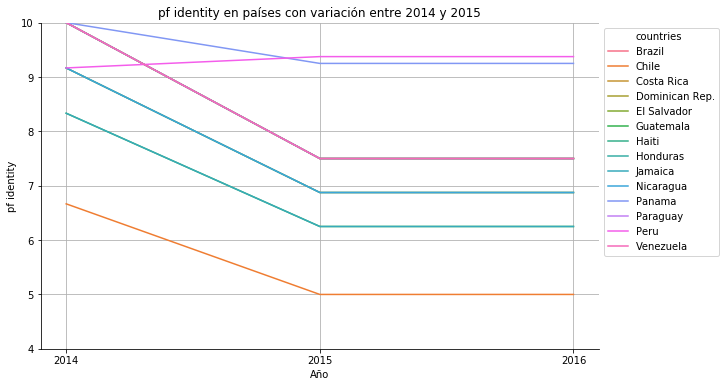

In [23]:
plt.figure(figsize=(10,6))
data_plot = latam[(latam.year >= 2014)&(latam.countries.isin(paises_int))]
indexes = data_plot.year.unique()
seaborn.lineplot(data=data_plot, x='year', y='pf_identity', hue='countries')
plt.xlabel('Año')
plt.ylabel('pf identity')
plt.title('pf identity en países con variación entre 2014 y 2015')
plt.grid(True)
plt.ylim(4, 10)
plt.xticks(indexes)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
seaborn.despine()


Se puede observar que entre 2014 y 2015, la mayoría de los países que tuvieron una variación en sus valores de pf identity, tuvieron un descenso y con la misma pendiente (excepto Panamá que tiene una pendiente menor). El único país que tuvo un ascenso, y mínimo, fue Perú.

#### 2.4 Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

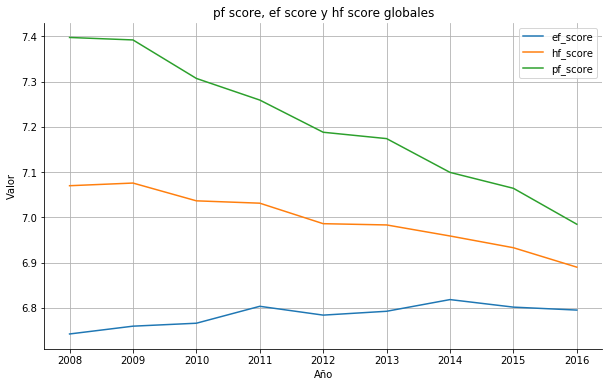

In [24]:
ef_score = dataset[['ef_score', 'countries', 'year', 'region']]
hf_score = dataset[['hf_score', 'countries', 'year', 'region']]
pf_score = dataset[['pf_score', 'countries', 'year', 'region']]

plt.figure(figsize=(10,6))
seaborn.lineplot(data=ef_score, x='year', y='ef_score', ci=None, label="ef_score")
seaborn.lineplot(data=hf_score, x='year', y='hf_score', ci=None, label="hf_score")
seaborn.lineplot(data=pf_score, x='year', y='pf_score', ci=None, label="pf_score")
plt.grid(True)
plt.title('pf score, ef score y hf score globales')
plt.ylabel('Valor')
plt.xlabel('Año')
seaborn.despine()

Se observa que hf score se encuentra en medio de pf score y ef score. Por lo tanto, podría suponerse que la variable hf_score resulta de un promedio de las otras dos. 

Al observar pf identity, no se encuentra similitud de comportamientos con hf score, ef score e incluso pf score; lo cual confirma que pf identity aporta a pf score pero no es la única involucrada.

## 3. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

#### 3.1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?

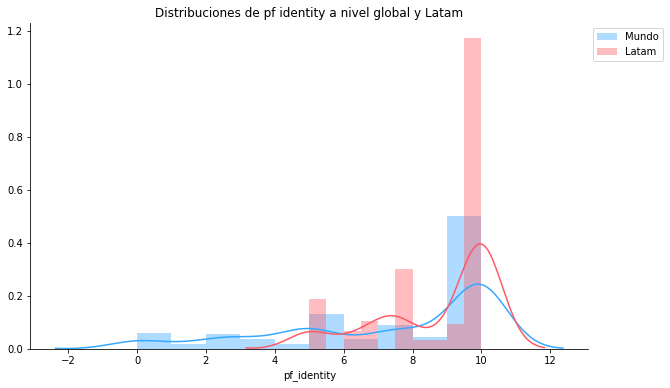

In [25]:
plt.figure(figsize=(10,6))
seaborn.distplot(dataset['pf_identity'].dropna(), bins=10, color=BLUE, label='Mundo')
seaborn.distplot(latam['pf_identity'].dropna(), bins=10, color=RED, label='Latam')
plt.title('Distribuciones de pf identity a nivel global y Latam')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
seaborn.despine()

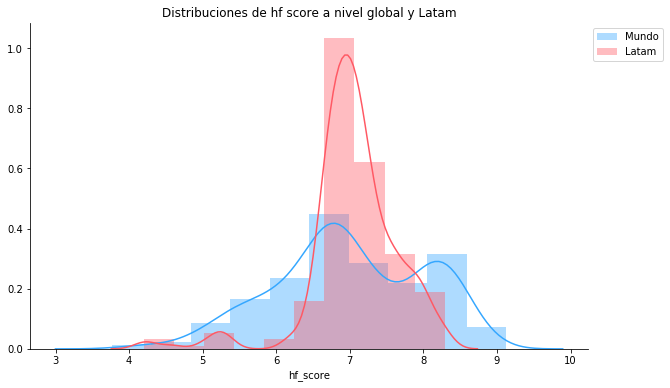

In [26]:
plt.figure(figsize=(10,6))
seaborn.distplot(dataset['hf_score'].dropna(), bins=10, color=BLUE, label='Mundo')
seaborn.distplot(latam['hf_score'].dropna(), bins=10, color=RED, label='Latam')
plt.title('Distribuciones de hf score a nivel global y Latam')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
seaborn.despine()

A simple vista no tiene forma de distribución de una distribución que nos resulte familiar.
hf_score, para el caso de latam tiene una forma similar a la normal alrededor del 7

Creemos que es correcto utilizar todos los valores con los que contamos.

#### 3.2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

In [27]:
#ToDo: revisar con cual forma calculamos la media y std
data_plot = dataset['pf_identity'].dropna()
mean = data_plot.mean()
desv = data_plot.std()
stats.kstest(data_plot, 'norm', args=(mean,desv))

KstestResult(statistic=0.23673609609146884, pvalue=2.0004263167944867e-68)

In [28]:
mean, desv = stats.norm.fit(dataset['pf_identity'].dropna())
stats.kstest(dataset['pf_identity'].dropna(), 'norm', args=(mean,desv))

KstestResult(statistic=0.2368216885475004, pvalue=1.7837097494493251e-68)

In [29]:
media, desv = stats.norm.fit(latam['pf_identity'].dropna())
stats.kstest(latam['pf_identity'].dropna(), 'norm', args=(mean,desv))

KstestResult(statistic=0.5269154043573636, pvalue=1.4424748572746725e-60)

In [30]:
media, desv = stats.norm.fit(dataset['hf_score'].dropna())
stats.kstest(dataset['hf_score'].dropna(), 'norm', args=(mean,desv))

KstestResult(statistic=0.164066294615201, pvalue=6.991823671230831e-33)

In [31]:
media, desv = stats.norm.fit(latam['hf_score'].dropna())
stats.kstest(latam['hf_score'].dropna(), 'norm', args=(mean,desv))

KstestResult(statistic=0.25794749619307233, pvalue=4.212212121167247e-14)

Dado que los p valores, de todos los ks test realizados, son cercanos a cero, debemos rechazar la hipótesis de que alguna de estas distribuciones sea normal.

#### 3.3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar ambas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.

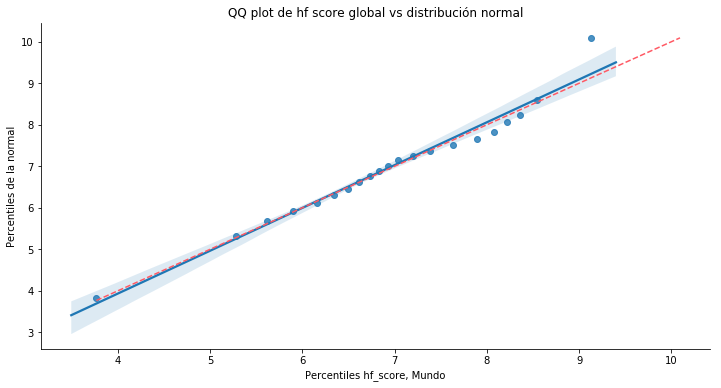

In [32]:
loc, scale = stats.norm.fit(dataset['hf_score'].dropna())
norm_dist = stats.norm(loc, scale)
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(dataset['hf_score'].dropna(), percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(dataset['hf_score'].dropna())), percs)
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles hf_score, Mundo')
plt.ylabel('Percentiles de la normal')
plt.title('QQ plot de hf score global vs distribución normal')
x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color=RED, ls="--")

seaborn.despine()

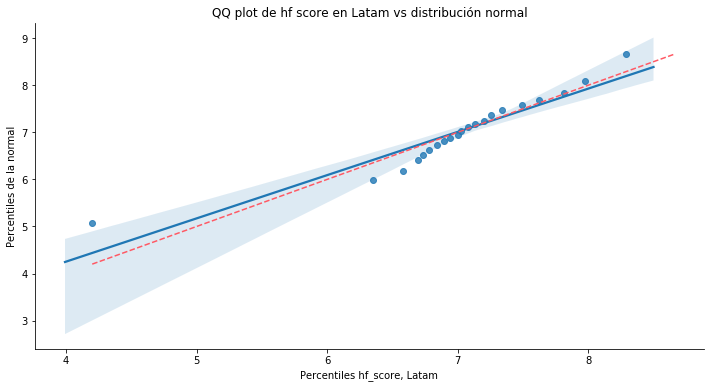

In [33]:
loc, scale = stats.norm.fit(latam['hf_score'].dropna())
norm_dist = stats.norm(loc, scale)
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(latam['hf_score'].dropna(), percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(latam['hf_score'].dropna())), percs)
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles hf_score, Latam')
plt.ylabel('Percentiles de la normal')
plt.title('QQ plot de hf score en Latam vs distribución normal')
x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color=RED, ls="--")

seaborn.despine()

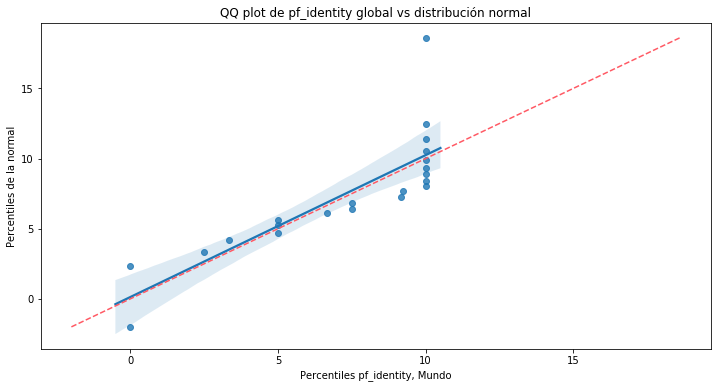

In [34]:
loc, scale = stats.norm.fit(dataset['pf_identity'].dropna())
norm_dist = stats.norm(loc, scale)
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(dataset['pf_identity'].dropna(), percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(dataset['pf_identity'].dropna())), percs)
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles pf_identity, Mundo')
plt.ylabel('Percentiles de la normal')
plt.title('QQ plot de pf_identity global vs distribución normal')
x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color=RED, ls="--")

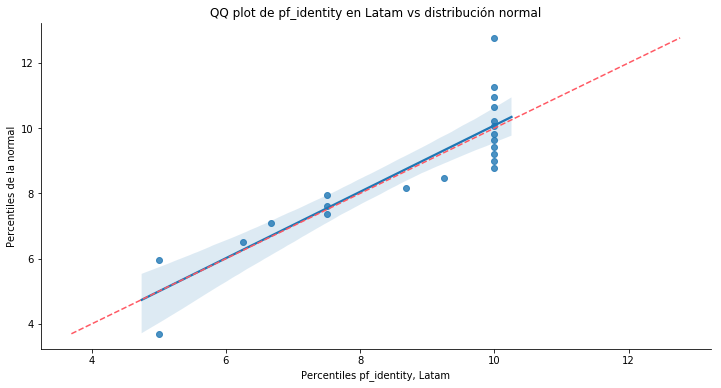

In [36]:
loc, scale = stats.norm.fit(latam['pf_identity'].dropna())
norm_dist = stats.norm(loc, scale)
percs = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(latam['pf_identity'].dropna(), percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(latam['pf_identity'].dropna())), percs)
plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles pf_identity, Latam')
plt.ylabel('Percentiles de la normal')
plt.title('QQ plot de pf_identity en Latam vs distribución normal')
x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color=RED, ls="--")

seaborn.despine()

#### 3.4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

In [37]:
stats.skew(dataset['hf_score'].dropna())

-0.21205190437691196

In [38]:
stats.skew(dataset['pf_identity'].dropna())

-0.9121780542847563

In [39]:
stats.kurtosis(dataset['hf_score'].dropna())

-0.5101904315124792

In [40]:
stats.kurtosis(dataset['pf_identity'].dropna())

-0.4148322234251629

In [41]:
stats.kurtosistest(dataset['hf_score'].dropna())

KurtosistestResult(statistic=-5.191645231714734, pvalue=2.08443899275983e-07)

In [42]:
stats.kurtosistest(dataset['pf_identity'].dropna())

KurtosistestResult(statistic=-3.920990777360115, pvalue=8.818563833245185e-05)

## 4. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)


#### 4.1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?

C:\Users\noelia\Anaconda3\envs\diplodatos\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\noelia\Anaconda3\envs\diplodatos\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 720x432 with 0 Axes>

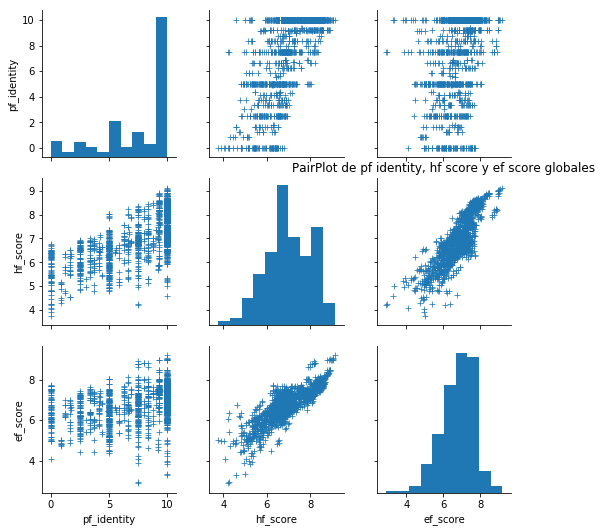

In [43]:
plt.figure(figsize=(10, 6))

seaborn.pairplot(
    data=dataset,
    vars=['pf_identity', 'hf_score', 'ef_score'],
    markers='+')
plt.title('PairPlot de pf identity, hf score y ef score globales')
seaborn.despine()

<Figure size 720x432 with 0 Axes>

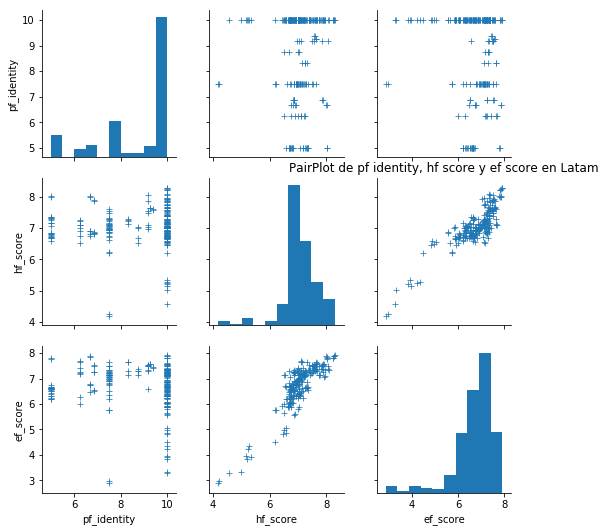

In [44]:
plt.figure(figsize=(10, 6))

seaborn.pairplot(
    data=latam,
    vars=['pf_identity', 'hf_score', 'ef_score'],
    markers='+')
plt.title('PairPlot de pf identity, hf score y ef score en Latam')
seaborn.despine()

De los gráficos obtenidos,tanto a nivel global como en Latam, no se puede observar que exista correlación entre las variables pf identity y hf score y ef score.

Lo que puede destacarse de pf identity es que para determinados valores presenta "líneas" verticales u horizontales, dependiendo del caso, y este comportamiento se asocia a que la variable es discreta.

Por otro lado, entre hf score y ef score sí parece haber una correlación cuya forma parece lineal

Text(0.5, 1.0, 'JointPlot de pf identity y hf score en Latam')

<Figure size 720x432 with 0 Axes>

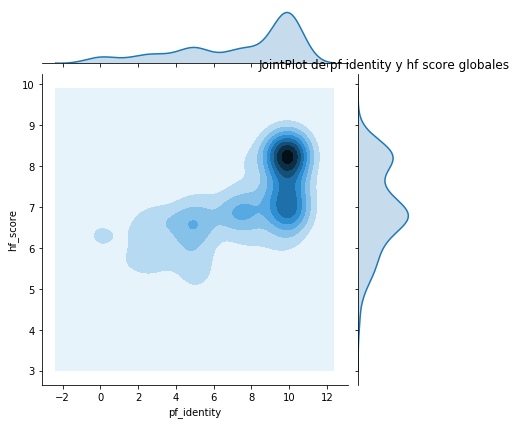

<Figure size 720x432 with 0 Axes>

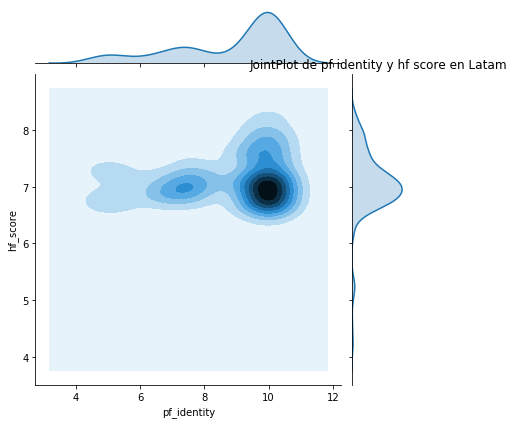

In [45]:
plt.figure(figsize=(10,6))
seaborn.jointplot(data=dataset,
                  x='pf_identity', y='hf_score', kind='kde')
plt.title('JointPlot de pf identity y hf score globales')

plt.figure(figsize=(10,6))
seaborn.jointplot(data=latam,
                  x='pf_identity', y='hf_score', kind='kde')
plt.title('JointPlot de pf identity y hf score en Latam')

Se puede observar que a nivel global los valores más altos de pf identity son los más frecuentes y que, por parte de hf score, los son aquellos medios y altos. Ésto no indica que estén correlacionados, ya que a nivel de probabilidad podrían darse cualquiera de las combinaciones, no sólo aquellas más oscuras.

Una lectura similar se hace para el caso de Latam, aunque hf score muestra valores más concentrados hacia los altos.

#### 4.2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.

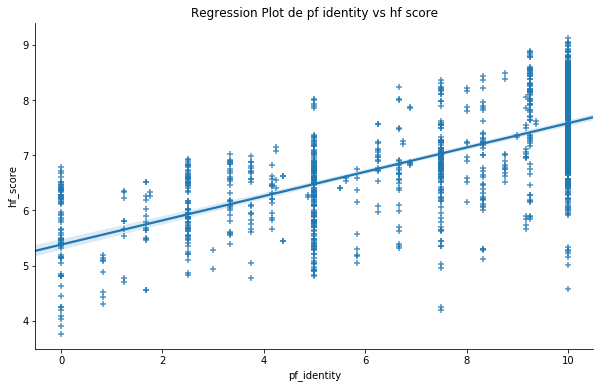

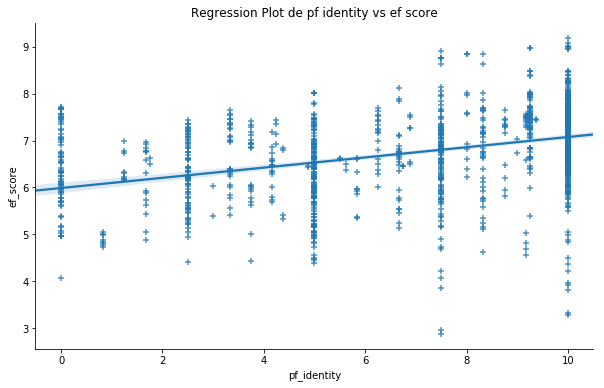

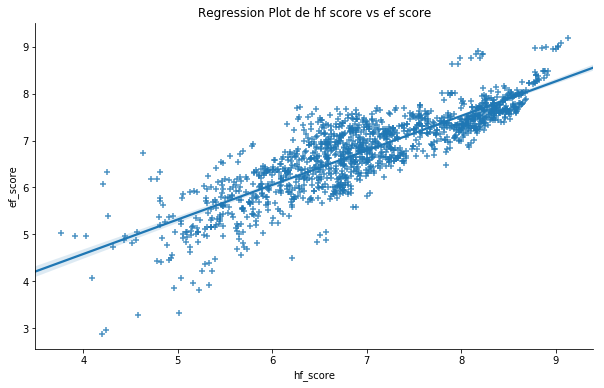

In [46]:
plt.figure(figsize=(10,6))
seaborn.regplot(data=dataset,
                x='pf_identity', y='hf_score',
                marker='+')
plt.title('Regression Plot de pf identity vs hf score')
seaborn.despine()

plt.figure(figsize=(10,6))
seaborn.regplot(data=dataset,
                x='pf_identity', y='ef_score',
                marker='+')
plt.title('Regression Plot de pf identity vs ef score')
seaborn.despine()

plt.figure(figsize=(10,6))
seaborn.regplot(data=dataset,
                x='hf_score', y='ef_score',
                marker='+')
plt.title('Regression Plot de hf score vs ef score')
seaborn.despine()

La regresión lineal estimada parece indicar que no existe correlación fuerte entre las variables pf identity y hf score, y pf identity y ef score. Pero se puede observar que entre hf score y ef score sí parece haber una correlación lineal.

#### 4.3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 

In [49]:
corr_data.corr(method ='spearman')

,pf_identity,hf_score,ef_score
pf_identity,1.000000,0.686109,0.426993
hf_score,0.686109,1.000000,0.860647
ef_score,0.426993,0.860647,1.000000


Usamos la correlación de spearman que no asume información sobre la
distribución de las variables, porque no validamos ninguna hipótesis
de comportamiento entre ellas.
Las variables hf score y ef score están altamente correlacionadas, lo
que es consistente con la forma de cálculo que esperamos, y que vimos
anteriormente.
Las variables pf_identity y ef_score no muestran fuerte correlación,
lo que es consistente si pensamos en que la libertad personal y la
libertad económica no están necesariamente relacionadas (pensando en
casos como el de Argentina, por ejemplo, con alta libertad personal
pero no libertad económica, o de paises de Medio Oriente, donde la
libertad personas está muy restringida, aunque esto no pase con la
libertad económica.

#### 4.4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)

In [ ]:
# ToDo